# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# para generar numeros aleatorios
import random

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [5]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
# data = np.loadtxt(os.path.join('data', 'ex2data1.txt'), delimiter=',')

# Cargamos el dataset
data = pd.read_csv('/content/drive/MyDrive/IA/LaboratoriosOficiales/Lab3-PatziColodroSarahValentina/american_bankruptcy.csv', delimiter=',')
#imprimir el data
#print(data.head())
display(data)
data.isnull().sum()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


,0
company_name,0
status_label,0
year,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0


In [6]:
#limpiar la caracteristica status_label para que 'alive': 1, 'failed': 0 (alive = True = 1: Si algo está "vivo", failed = False = 0: Si algo ha "fallado")
data['status_label'] = data['status_label'].replace({'alive': 1, 'failed': 0})
#imprimir el data
display(data)
#mostrar informacion de cuantas filas de 0 y cuantas de 1 tiene status_label
print(data['status_label'].value_counts())

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,1,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,1,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,1,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,1,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


status_label
1    73462
0     5220
Name: count, dtype: int64


In [7]:
#eliminar la columna company_name y la del year
data = data.drop(['company_name', 'year'], axis=1)
#imprimir el data
display(data)

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,1,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,1,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,1,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,1,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [8]:
# Selección de las primeras 11 características (X1 a X11) y la variable objetivo es 'status_label'

#definir valor de X escogiendo por numero de posicion las que yo quiera poner
X = data.iloc[:30000,[1,2,3,4,5,6,7,8,9,10,11]]
y = data.iloc[:30000,0]

#imprimir la cantidad de filas y columnas que tiene el data
print('En X: ',X.shape)
print('En Y: ',y.shape)


#imprimir
print('Visualización de Columnas y Filas Usadas:')
print('{:>0s}{:>21s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}'.format( 'y','X[:,0]','X[:,1]','X[:,2]','X[:,3]','X[:,4]','X[:,5]','X[:,6]','X[:,7]','X[:,8]','X[:,9]','X[:,10]')) # Imprime los nombres de las columnas
# Ajusta la cantidad de valores que imprimes dentro del loop para que coincida con la cantidad de columnas en X
for i in range(10):
    print('{:<15.0f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}'.format(
        y.iloc[i], X.iloc[i, 0], X.iloc[i, 1], X.iloc[i, 2], X.iloc[i, 3], X.iloc[i, 4], X.iloc[i, 5], X.iloc[i, 6], X.iloc[i, 7], X.iloc[i, 8],X.iloc[i, 9],X.iloc[i, 10]
    ))

#convertir X y Y en numpy
X = X.to_numpy()
y = y.to_numpy()

En X:  (30000, 11)
En Y:  (30000,)
Visualización de Columnas y Filas Usadas:
y               X[:,0]         X[:,1]         X[:,2]         X[:,3]         X[:,4]         X[:,5]         X[:,6]         X[:,7]         X[:,8]         X[:,9]        X[:,10]
1              511.267        833.107        18.373         89.031         336.018        35.163         128.348        372.752        1024.333       740.998        180.447        
1              485.856        713.811        18.577         64.367         320.590        18.531         115.187        377.118        874.255        701.854        179.987        
1              436.656        526.477        22.496         27.207         286.588        -58.939        77.528         364.593        638.721        710.199        217.699        
1              396.412        496.747        27.172         30.745         259.954        -12.410        66.322         143.329        606.337        686.621        164.658        
1              432.204    

### **Cargamos variables distintas para guardar 100 filas posteriores a las usadas para el entrenamiento**

Se usa a partir de 30000

In [9]:
# Seleccionamos las filas 17,000 a 17,100 para las características y la variable de salida
X_predic = data.iloc[30000:30100, [1,2,3,4,5,6,7,8,9,10,11]]  # Características de las filas adicionales
y_predic = data.iloc[30000:30100, 0]   # Variable de salida de las filas adicionales

print('Visualización de Columnas y Filas Usadas:')
print('{:>0s}{:>21s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}'.format( 'y','X[:,0]','X[:,1]','X[:,2]','X[:,3]','X[:,4]','X[:,5]','X[:,6]','X[:,7]','X[:,8]','X[:,9]','X[:,10]')) # Imprime los nombres de las columnas
# Ajusta la cantidad de valores que imprimes dentro del loop para que coincida con la cantidad de columnas en X
for i in range(10):
    print('{:<15.0f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}{:<15.3f}'.format(
        y_predic.iloc[i], X_predic.iloc[i, 0], X_predic.iloc[i, 1], X_predic.iloc[i, 2], X_predic.iloc[i, 3], X_predic.iloc[i, 4], X_predic.iloc[i, 5], X_predic.iloc[i, 6], X_predic.iloc[i, 7], X_predic.iloc[i, 8],X_predic.iloc[i, 9],X_predic.iloc[i, 10]
    ))

#imprimir la cantidad de filas y columnas que tiene el data
print('En X: ',X_predic.shape)
print('En Y: ',y_predic.shape)

Visualización de Columnas y Filas Usadas:
y               X[:,0]         X[:,1]         X[:,2]         X[:,3]         X[:,4]         X[:,5]         X[:,6]         X[:,7]         X[:,8]         X[:,9]        X[:,10]
1              508.745        883.044        48.895         162.781        0.000          -37.357        405.671        1085.783       1326.256       1590.250       741.038        
1              489.582        938.560        44.019         151.229        0.000          -45.839        422.964        345.853        1385.785       1577.378       936.208        
1              542.771        1025.952       40.998         173.606        0.000          241.848        469.800        549.656        1513.779       1698.892       882.806        
1              589.854        992.993        44.401         134.097        0.000          -123.733       441.957        150.132        1476.203       1611.573       954.229        
1              1.433          1.523          0.068          0

### **Normalizar Caracteristicas**
 Este es un paso importante en el preprocesamiento de datos en aprendizaje automático, transformamos las caracteristicas a valores similares para hacer que converjan mas rápido

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# Llama a la funcion featureNormalize con el parametro X para obtener los datos normalizados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print('Datos normalizados:\n',X_norm) # Muestra los datos normalizados


Media calculada:
 [1604.36667673 3048.1542342   232.72275243  750.67827963  385.38554427
  291.4562943   543.41139227 6197.80295535 4523.1932335  5487.64315177
 1308.3588202 ]
Desviación estandar calculada:
 [ 5701.85797305 13505.17778097  1007.28129355  3084.65086856
  1619.81769415  1809.1245997   2018.06865466 25964.38140853
 18183.18608337 19547.92994315  4770.08646116]
Datos normalizados:
 [[-0.19170938 -0.16401467 -0.21280029 ... -0.19242284 -0.24282086
  -0.23645522]
 [-0.196166   -0.17284802 -0.21259777 ... -0.20067651 -0.24482332
  -0.23655165]
 [-0.20479477 -0.18671929 -0.20870709 ... -0.2136299  -0.24439642
  -0.22864571]
 ...
 [-0.20032342 -0.17093986 -0.18541866 ... -0.18987224 -0.21192516
  -0.18417147]
 [-0.19359649 -0.16975809 -0.19276617 ... -0.18557321 -0.20781823
  -0.13494469]
 [-0.18452313 -0.16650467 -0.18516352 ... -0.18146882 -0.19637645
  -0.11860704]]


### Normalizar datos prediccion

In [12]:
def  featureNormalize(X_predic):
    X_norm_predic = X_predic.copy()
    mu = np.zeros(X_predic.shape[1])
    sigma = np.zeros(X_predic.shape[1])

    mu = np.mean(X_predic, axis = 0)
    sigma = np.std(X_predic, axis = 0)
    X_norm_predic = (X_predic - mu) / sigma

    return X_norm_predic, mu, sigma

In [13]:
# Llama a la funcion featureNormalize con el parametro X para obtener los datos normalizados
X_norm_predic, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print('Datos normalizados:\n',X_norm_predic) # Muestra los datos normalizados


Media calculada:
 [1604.36667673 3048.1542342   232.72275243  750.67827963  385.38554427
  291.4562943   543.41139227 6197.80295535 4523.1932335  5487.64315177
 1308.3588202 ]
Desviación estandar calculada:
 [ 5701.85797305 13505.17778097  1007.28129355  3084.65086856
  1619.81769415  1809.1245997   2018.06865466 25964.38140853
 18183.18608337 19547.92994315  4770.08646116]
Datos normalizados:
 [[-0.19170938 -0.16401467 -0.21280029 ... -0.19242284 -0.24282086
  -0.23645522]
 [-0.196166   -0.17284802 -0.21259777 ... -0.20067651 -0.24482332
  -0.23655165]
 [-0.20479477 -0.18671929 -0.20870709 ... -0.2136299  -0.24439642
  -0.22864571]
 ...
 [-0.20032342 -0.17093986 -0.18541866 ... -0.18987224 -0.21192516
  -0.18417147]
 [-0.19359649 -0.16975809 -0.19276617 ... -0.18557321 -0.20781823
  -0.13494469]
 [-0.18452313 -0.16650467 -0.18516352 ... -0.18146882 -0.19637645
  -0.11860704]]


### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [14]:
#El 0 se convierte en False y El 1 se convierte en True
#y_bool = y != 0  # Convierte 0 a False y cualquier otro valor a True
def plotData(X_norm, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1  # Identificar ejemplos positivos
    neg = y == 0  # Identificar ejemplos negativos

    # Plot Examples
    pyplot.plot(X_norm[pos, 0], X_norm[pos, 1], 'k*', lw=2, ms=10)  # Marcar los ejemplos positivos
    pyplot.plot(X_norm[neg, 0], X_norm[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)  # Marcar los ejemplos negativos
    return fig


Se llama a la función implementada para mostrar los datos cargados:

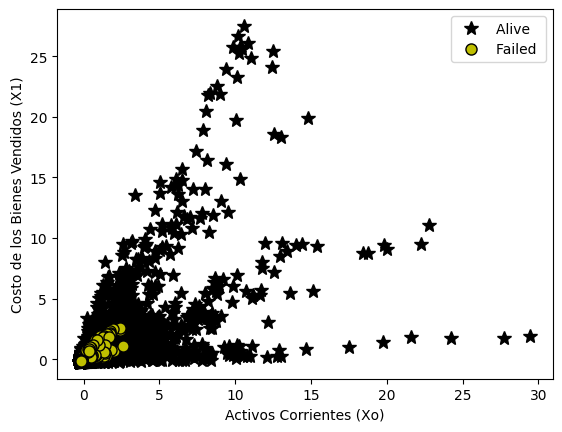

In [15]:
plotData(X_norm, y)
# adiciona etiquetas para los ejes
#Las líneas pyplot.xlabel() y pyplot.ylabel() etiquetan los ejes del gráfico, no las variables X e Y, entonces en el eje X va X0 y en el eje Y va X1
pyplot.xlabel('Activos Corrientes (Xo)')
pyplot.ylabel('Costo de los Bienes Vendidos (X1)')
pyplot.legend(['Alive ', 'Failed '])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ es la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [16]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [17]:
# Prueba la implementacion de la funcion sigmoid
z = [-9099991, 309000000, 0]
g = calcularSigmoide(z)

print('g(', z, ') = ', g)

g( [-9099991, 309000000, 0] ) =  [0.  1.  0.5]


<ipython-input-16-7682412b64a1>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [18]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_norm.shape
# Agraga el termino de intercepción a A (sesgo)
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X_norm[:])

[[ 1.         -0.19170938 -0.16401467 ... -0.19242284 -0.24282086
  -0.23645522]
 [ 1.         -0.196166   -0.17284802 ... -0.20067651 -0.24482332
  -0.23655165]
 [ 1.         -0.20479477 -0.18671929 ... -0.2136299  -0.24439642
  -0.22864571]
 ...
 [ 1.         -0.20032342 -0.17093986 ... -0.18987224 -0.21192516
  -0.18417147]
 [ 1.         -0.19359649 -0.16975809 ... -0.18557321 -0.20781823
  -0.13494469]
 [ 1.         -0.18452313 -0.16650467 ... -0.18146882 -0.19637645
  -0.11860704]]


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [19]:
print("Dimensiones de X después de agregar el sesgo:", X_norm.shape)

Dimensiones de X después de agregar el sesgo: (30000, 12)


In [20]:
def calcularCosto(theta, X_norm, y):
    m = y.size
    J = 0
    h = calcularSigmoide(X_norm.dot(theta))
    J = (1 / m) * np.sum(-y.dot(np.log(h + 1e-10)) - (1 - y).dot(np.log(1 - h + 1e-10)))
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [21]:
def descensoGradiente(theta, X_norm, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X_norm.dot(theta))
        theta = theta - (alpha / m) * (h - y).dot(X_norm)

        # Monitoreo del costo cada 100 iteraciones
        #if i % 100 == 0:
        #    costo = calcularCosto(theta, X_norm, y)
        #    print(f"Costo en la iteración {i}: {costo}")

        J_history.append(calcularCosto(theta, X_norm, y))
    return theta, J_history

### Nueva sección

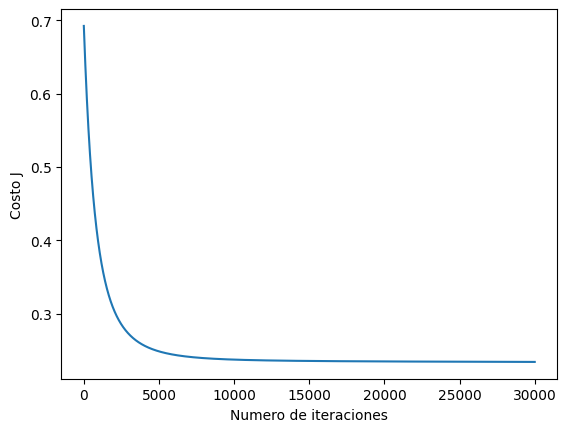

theta calculado por el descenso por el gradiente: [ 2.74735951e+00  9.87843253e-02  1.11173182e-02 -4.34172191e-02
  1.53643345e-01  3.43826845e-03  3.05193024e-01  1.26164081e-01
  2.56228986e-01  4.19928539e-02 -1.22861216e-03 -1.26940521e-01]
Theta encontrada por descenso gradiente: 2.7474, 0.0988
Costo final después de 30000 iteraciones: 0.23


In [22]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 30000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12) # son solo las 11 columnas de X más 1 que aumentamos de unos (sesgo)
theta, J_history = descensoGradiente(theta, X_norm, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final después de {num_iters} iteraciones: {J_history[-1]:.2f}")


In [23]:
print(J_history[-1])

0.23405090135803022


In [24]:
for i in range(1,10):
  prob = calcularSigmoide(np.dot([random.uniform(0,1) for _ in range(12)], theta))
  print(i,'probabilidad de quiebra de empresas: {:.3f}%'.format(prob))

1 probabilidad de quiebra de empresas: 0.907%
2 probabilidad de quiebra de empresas: 0.921%
3 probabilidad de quiebra de empresas: 0.859%
4 probabilidad de quiebra de empresas: 0.953%
5 probabilidad de quiebra de empresas: 0.918%
6 probabilidad de quiebra de empresas: 0.714%
7 probabilidad de quiebra de empresas: 0.874%
8 probabilidad de quiebra de empresas: 0.776%
9 probabilidad de quiebra de empresas: 0.862%


### Calculamos la precision del entrenamiento

In [25]:
def predict(theta, X_norm):
    m = X_norm.shape[0]
    p = np.zeros(m)
    p = np.round(calcularSigmoide(X_norm.dot(theta.reshape(-1,1)))) # Redimensiona theta para ser un vector columna
    return p

p = predict(theta, X_norm) # Usa X_norm en lugar de X como entrada
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

#imprimir theta
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))

Precisión de entrenamiento: 93.56 %
Theta encontrada por descenso gradiente: 2.7474, 0.0988
